In [1]:
from sklearn import datasets
import numpy as np

In [2]:
# loading dataset
iris = datasets.load_iris()

In [3]:
# looking at features
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
# selecting 2 features
X = iris.data[:,[2,3]]

# target
y = iris.target

In [5]:
# unique labels
np.unique(y)

array([0, 1, 2])

#### `train test split`

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

#  stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset

In [7]:
print('Labels counts in y:', np.bincount(y))

#Labels counts in y: [50 50 50]

print('Labels counts in y_train:', np.bincount(y_train))

#Labels counts in y_train: [35 35 35]

print('Labels counts in y_test:', np.bincount(y_test))

#Labels counts in y_test: [15 15 15]


Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


#### `feature scaling`

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [9]:
X_train_std = sc.transform(X_train)

X_test_std = sc.transform(X_test)


#### `training the model`

##### Most algorithms in scikit-learn already support multiclass classification by default via the one-versus-rest (OvR) method

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2,metric='minkowski')


In [11]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

#### `Making prediction on test set`

In [12]:
y_pred = knn.predict(X_test_std)

In [13]:
y_pred

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [14]:
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 0


In [15]:
print(f'Misclassified error %: {100*(y_test != y_pred).sum()/len(y_test)}')

Misclassified error %: 0.0


In [16]:
print(f'Classification accuracy %: {100*(1-(y_test != y_pred).sum()/len(y_test))}')

Classification accuracy %: 100.0


In [17]:
# sklearn implementation of accuracy
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 1.0


In [18]:
# Also each classifier comes with score in sklearn
print(f'Accuracy: {knn.score(X_test_std, y_test)}')

Accuracy: 1.0


#### `Plotting it`

In [19]:
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,

                          resolution=0.02):

    # setup marker generator and color map

    markers = ('o', 's', '^', 'v', '<')

    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1

    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),

                           np.arange(x2_min, x2_max, resolution))

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)

    plt.xlim(xx1.min(), xx1.max())

    plt.ylim(xx2.min(), xx2.max())

    # plot class examples

    for idx, cl in enumerate(np.unique(y)):

        plt.scatter(x=X[y == cl, 0],

                    y=X[y == cl, 1],

                    alpha=0.8,

                    c=colors[idx],

                    marker=markers[idx],

                    label=f'Class {cl}',

                    edgecolor='black')

    # highlight test examples

    if test_idx:

        # plot all examples

        X_test, y_test = X[test_idx, :], y[test_idx]

        

        plt.scatter(X_test[:, 0], X_test[:, 1],

                    c='none', edgecolor='black', alpha=1.0,

                    linewidth=1, marker='o',

                    s=100, label='Test set')


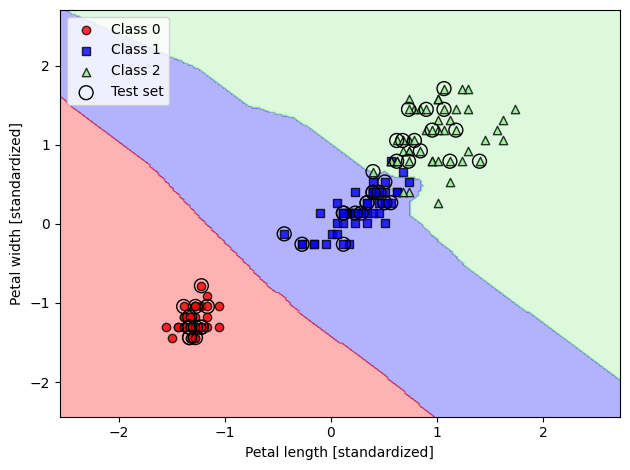

In [20]:
X_combined_std = np.vstack((X_train_std, X_test_std))

y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std,y=y_combined,classifier=knn,test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')

plt.ylabel('Petal width [standardized]')

plt.legend(loc='upper left')

plt.tight_layout()

plt.show()
